In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np

In [2]:
# set up settings
plt.rcParams.update({
    "text.usetex": True,      
    "font.family": "serif",    
    "font.serif": ["Computer Modern"],  
})

def get_ticks_labels(labels, num_ticks=4):
    indices = np.linspace(0, len(labels) - 1, num=num_ticks, dtype=int)
    return indices, [labels[i] for i in indices]

def format_sci(labels, sigfigs=1):
    return [f"{float(label):.{sigfigs}e}" for label in labels]

pd.set_option('display.precision', 10)

In [3]:
# make matrices
def survival_matrix(graph='circular'):
    df = pd.read_csv(f"data_resol/{graph}.csv", usecols=['period_init', 'v_kick', 'bound?'])
    data = df.groupby(['period_init', 'v_kick'], as_index=False)['bound?'].mean()
    matrix = data.pivot(index='v_kick', columns='period_init', values='bound?').astype('float')
    return matrix

def collision_matrix():
    df = pd.read_csv(f"data_resol/collide_circular.csv", usecols=['period_init', 'v_kick', 'collide?'])
    data = df.groupby(['period_init', 'v_kick'], as_index=False)['collide?'].mean()
    matrix = data.pivot(index='v_kick', columns='period_init', values='collide?').astype('float')
    return matrix

def tighten_matrix(graph='apoapsis'):
    df = pd.read_csv(f"data_resol/{graph}.csv", usecols=['period_init', 'v_kick', 'tighten?'])
    data = df.groupby(['period_init', 'v_kick'], as_index=False)['tighten?'].mean()
    matrix = data.pivot(index='v_kick', columns='period_init', values='tighten?').astype('float')
    return matrix

def circularize_matrix(graph='apoapsis'):
    df = pd.read_csv(f"data_resol/{graph}.csv", usecols=['period_init', 'v_kick', 'circularize?'])
    data = df.groupby(['period_init', 'v_kick'], as_index=False)['circularize?'].mean()
    matrix = data.pivot(index='v_kick', columns='period_init', values='circularize?').astype('float')
    return matrix

def tighten_matrix_v2(graph='apoapsis'):
    df = pd.read_csv(f"data_resol/{graph}_v2.csv", usecols=['period_init', 'v_kick', 'tighten?'])
    data = df.groupby(['period_init', 'v_kick'], as_index=False)['tighten?'].mean()
    matrix = data.pivot(index='v_kick', columns='period_init', values='tighten?').astype('float')
    return matrix

def circularize_matrix_v2(graph='apoapsis'):
    df = pd.read_csv(f"data_resol/{graph}_v2.csv", usecols=['period_init', 'v_kick', 'circularize?'])
    data = df.groupby(['period_init', 'v_kick'], as_index=False)['circularize?'].mean()
    matrix = data.pivot(index='v_kick', columns='period_init', values='circularize?').astype('float')
    return matrix

a: 0.1504202
 b: 0.14893520000000002 
 c: 0.13118449999999998 
 d: 0.196178


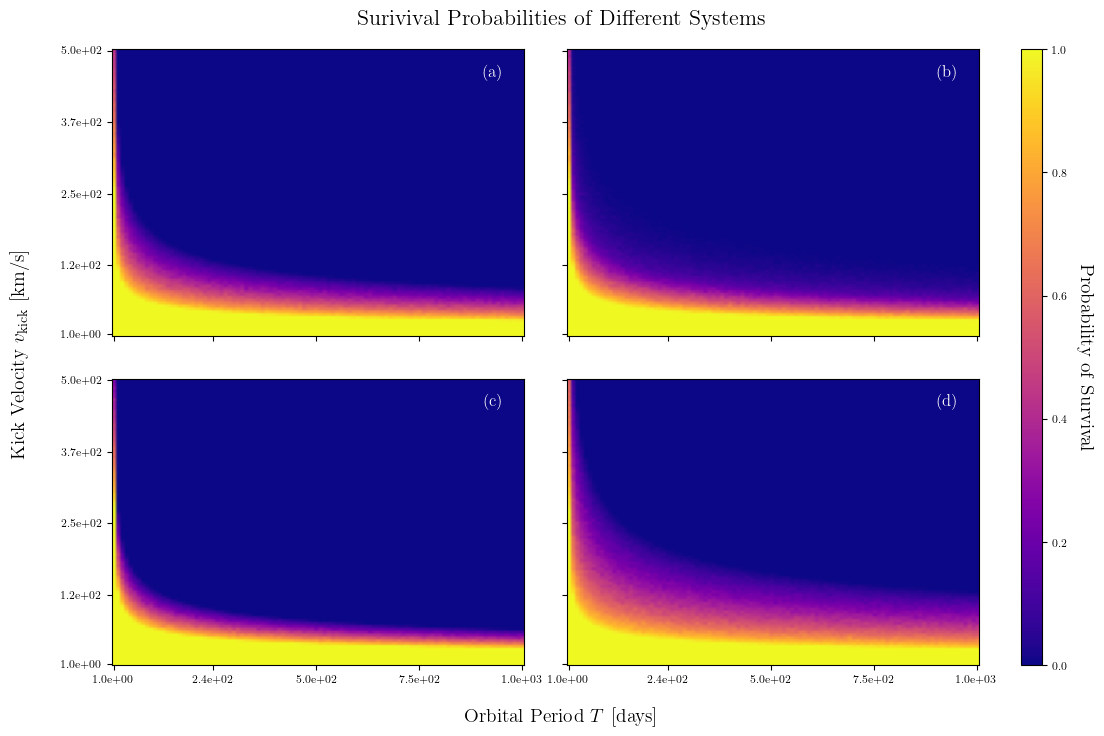

In [4]:
# survival graphs
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
survival_list = ['circular', 'elliptical', 'apoapsis', 'periapsis']
labels = ['(a)', '(b)', '(c)', '(d)']

fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 0.05], wspace=0.15, hspace=0.15)

axes = [fig.add_subplot(gs[i, j]) for i in range(2) for j in range(2)]

for i, (graph, ax, label) in enumerate(zip(survival_list, axes, labels)):
    matrix = survival_matrix(graph)
    img = ax.imshow(matrix, origin='lower', cmap='plasma', aspect='auto')

    x_ticks, x_labels_raw = get_ticks_labels(matrix.columns, num_ticks=5)
    x_labels = format_sci(x_labels_raw)
    y_ticks, y_labels_raw = get_ticks_labels(matrix.index, num_ticks=5)
    y_labels = format_sci(y_labels_raw)

    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)

    if True: #i in [2]:
        ax.set_xticklabels(x_labels, fontsize=8)
    else:
        ax.set_xticklabels([])

    if True: #i in [2]:
        ax.set_yticklabels(y_labels, fontsize=8)
    else:
        ax.set_yticklabels([])

    ax.text(0.95, 0.95, label, fontsize=12, color='white', ha='right', va='top', transform=ax.transAxes)
    ax.label_outer()

cax = fig.add_subplot(gs[:, 2])  
cbar = fig.colorbar(img, cax=cax)
cbar.set_label('Probability of Survival', fontsize=14, rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=8)

fig.text(0.5, 0.04, r'Orbital Period $T$ [days]', ha='center', fontsize=14)
fig.text(0.04, 0.5, r'Kick Velocity $v_{\mathrm{kick}}$ [km/s]', va='center', rotation='vertical', fontsize=14)
fig.suptitle('Surivival Probabilities of Different Systems', fontsize=16, y=0.93)

print(f"a: {survival_matrix("circular").mean().mean()}\n b: {survival_matrix("elliptical").mean().mean()} \n c: {survival_matrix("apoapsis").mean().mean()} \n d: {survival_matrix("periapsis").mean().mean()}")
fig.savefig('graphs_resol/survival_probability.png', dpi=600)
plt.show()
plt.close()

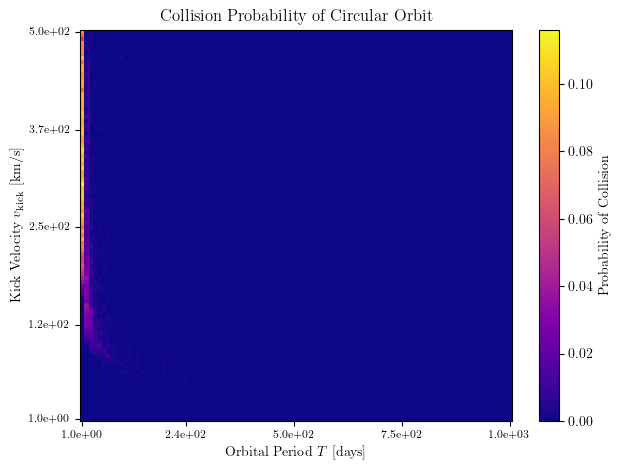

0.0007630999999999998


In [5]:
# collision graph
fig, ax = plt.subplots()
matrix = collision_matrix()

img = plt.imshow(matrix, axes=ax, cmap='plasma', aspect='auto')
x_ticks, x_labels_raw = get_ticks_labels(matrix.columns, num_ticks=5)
x_labels = format_sci(x_labels_raw)
y_ticks, y_labels_raw = get_ticks_labels(matrix.index, num_ticks=5)
y_labels = format_sci(y_labels_raw)

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, fontsize=8)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels, fontsize=8)
ax.invert_yaxis()

plt.xlabel(r'Orbital Period $T$ [days]')
plt.ylabel(r'Kick Velocity $v_{\mathrm{kick}}$ [km/s]')
plt.title(r'Collision Probability of Circular Orbit')

plt.colorbar(img, ax=ax, label='Probability of Collision')
fig.savefig('graphs_resol/collision_probability.png', dpi=600)

plt.tight_layout()
plt.show()

print(matrix.mean().mean())

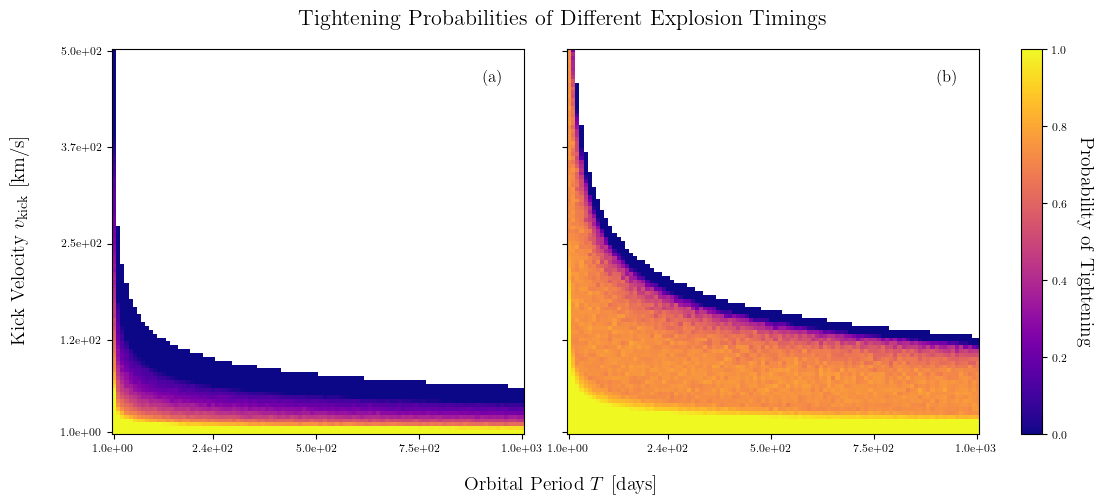

In [6]:
# tightening graphs
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 0.05], wspace=0.15, hspace=0.15)

tighten_list = ['apoapsis', 'periapsis']
axes = [fig.add_subplot(gs[0, j]) for j in range(2)]
labels = ['(a)', '(b)']

for i, (graph, ax, label) in enumerate(zip(tighten_list, axes, labels)):
    matrix = tighten_matrix(graph)
    img = ax.imshow(matrix, origin='lower', cmap='plasma', aspect='auto')

    x_ticks, x_labels_raw = get_ticks_labels(matrix.columns, num_ticks=5)
    x_labels = format_sci(x_labels_raw)
    y_ticks, y_labels_raw = get_ticks_labels(matrix.index, num_ticks=5)
    y_labels = format_sci(y_labels_raw)

    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)

    if True: #i in [2]:
        ax.set_xticklabels(x_labels, fontsize=8)
    else:
        ax.set_xticklabels([])

    if True: #i in [2]:
        ax.set_yticklabels(y_labels, fontsize=8)
    else:
        ax.set_yticklabels([])

    ax.text(0.95, 0.95, label, fontsize=12, color='black', ha='right', va='top', transform=ax.transAxes)
    ax.label_outer()

cax = fig.add_subplot(gs[0, 2])  
cbar = fig.colorbar(img, cax=cax)
cbar.set_label('Probability of Tightening', fontsize=14, rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=8)

fig.text(0.5, 0.0, r'Orbital Period $T$ [days]', ha='center', fontsize=14)
fig.text(0.04, 0.5, r'Kick Velocity $v_{\mathrm{kick}}$ [km/s]', va='center', rotation='vertical', fontsize=14)
fig.suptitle('Tightening Probabilities of Different Explosion Timings', fontsize=16, y=0.96)
fig.savefig('graphs_resol/tightening_probabilities')

plt.show()
plt.close()

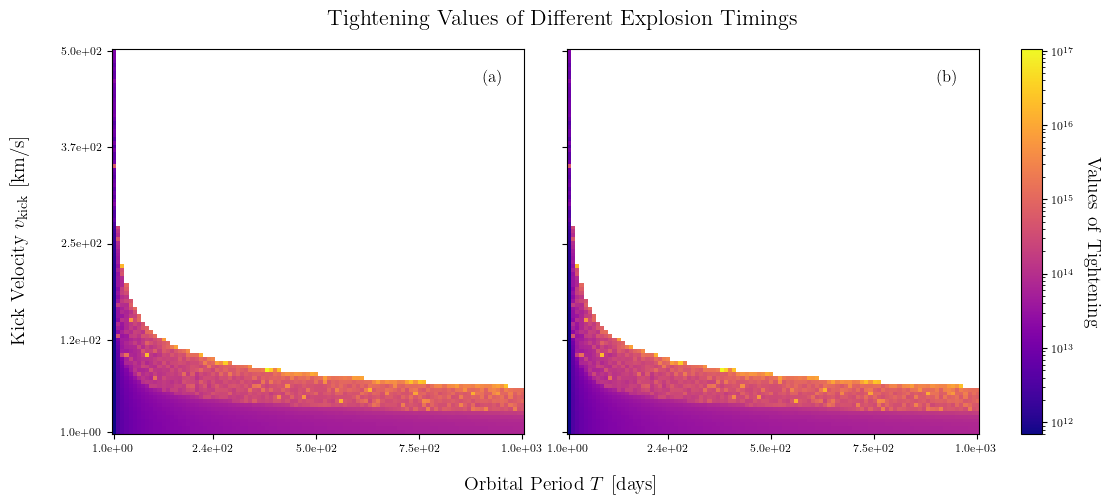

In [11]:
# tightening value graphs
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm

fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 0.05], wspace=0.15, hspace=0.15)

tighten_list = ['apoapsis', 'periapsis']
axes = [fig.add_subplot(gs[0, j]) for j in range(2)]
labels = ['(a)', '(b)']

for i, (graph, ax, label) in enumerate(zip(tighten_list, axes, labels)):
    matrix = tighten_matrix_v2('apoapsis')
    img = ax.imshow(matrix, origin='lower', cmap='plasma', aspect='auto', norm=LogNorm())

    x_ticks, x_labels_raw = get_ticks_labels(matrix.columns, num_ticks=5)
    x_labels = format_sci(x_labels_raw)
    y_ticks, y_labels_raw = get_ticks_labels(matrix.index, num_ticks=5)
    y_labels = format_sci(y_labels_raw)

    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)

    if True: #i in [2]:
        ax.set_xticklabels(x_labels, fontsize=8)
    else:
        ax.set_xticklabels([])

    if True: #i in [2]:
        ax.set_yticklabels(y_labels, fontsize=8)
    else:
        ax.set_yticklabels([])

    ax.text(0.95, 0.95, label, fontsize=12, color='black', ha='right', va='top', transform=ax.transAxes)
    ax.label_outer()

cax = fig.add_subplot(gs[0, 2])  
cbar = fig.colorbar(img, cax=cax)
cbar.set_label('Values of Tightening', fontsize=14, rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=8)

fig.text(0.5, 0.0, r'Orbital Period $T$ [days]', ha='center', fontsize=14)
fig.text(0.04, 0.5, r'Kick Velocity $v_{\mathrm{kick}}$ [km/s]', va='center', rotation='vertical', fontsize=14)
fig.suptitle('Tightening Values of Different Explosion Timings', fontsize=16, y=0.96)
fig.savefig('graphs_resol/tightening_probabilities_v2')

plt.show()
plt.close()

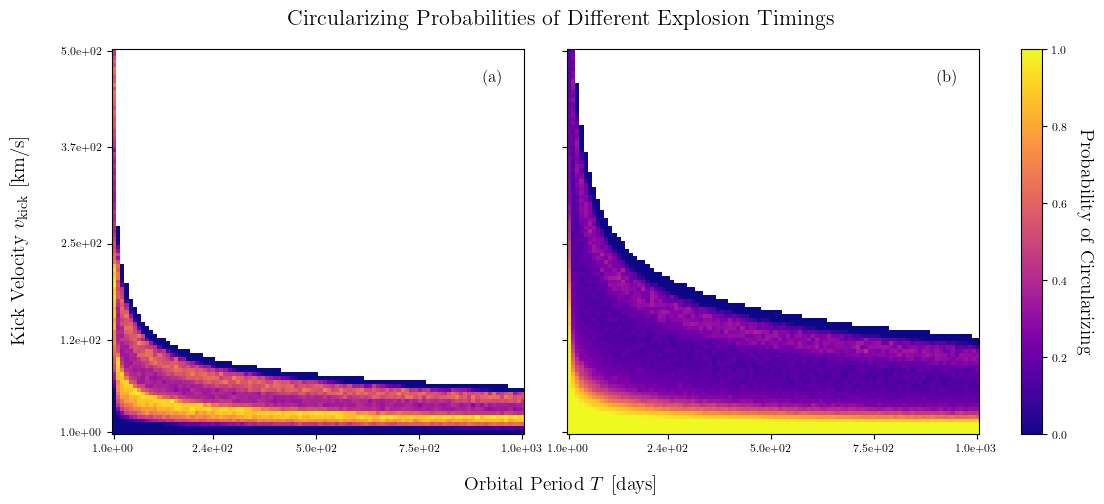

In [7]:
# circularizing graphs 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 0.05], wspace=0.15, hspace=0.15)

circular_list = ['apoapsis', 'periapsis']
axes = [fig.add_subplot(gs[0, j]) for j in range(2)]
labels = ['(a)', '(b)']

for i, (graph, ax, label) in enumerate(zip(circular_list, axes, labels)):
    matrix = circularize_matrix(graph)
    img = ax.imshow(matrix, origin='lower', cmap='plasma', aspect='auto')

    x_ticks, x_labels_raw = get_ticks_labels(matrix.columns, num_ticks=5)
    x_labels = format_sci(x_labels_raw)
    y_ticks, y_labels_raw = get_ticks_labels(matrix.index, num_ticks=5)
    y_labels = format_sci(y_labels_raw)

    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)

    if True: #i in [2]:
        ax.set_xticklabels(x_labels, fontsize=8)
    else:
        ax.set_xticklabels([])

    if True: #i in [2]:
        ax.set_yticklabels(y_labels, fontsize=8)
    else:
        ax.set_yticklabels([])

    ax.text(0.95, 0.95, label, fontsize=12, color='black', ha='right', va='top', transform=ax.transAxes)
    ax.label_outer()

cax = fig.add_subplot(gs[0, 2])  
cbar = fig.colorbar(img, cax=cax)
cbar.set_label('Probability of Circularizing', fontsize=14, rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=8)

fig.text(0.5, 0.0, r'Orbital Period $T$ [days]', ha='center', fontsize=14)
fig.text(0.04, 0.5, r'Kick Velocity $v_{\mathrm{kick}}$ [km/s]', va='center', rotation='vertical', fontsize=14)
fig.suptitle('Circularizing Probabilities of Different Explosion Timings', fontsize=16, y=0.96)
fig.savefig('graphs_resol/circularizing_probabilities')

plt.show()
plt.close()

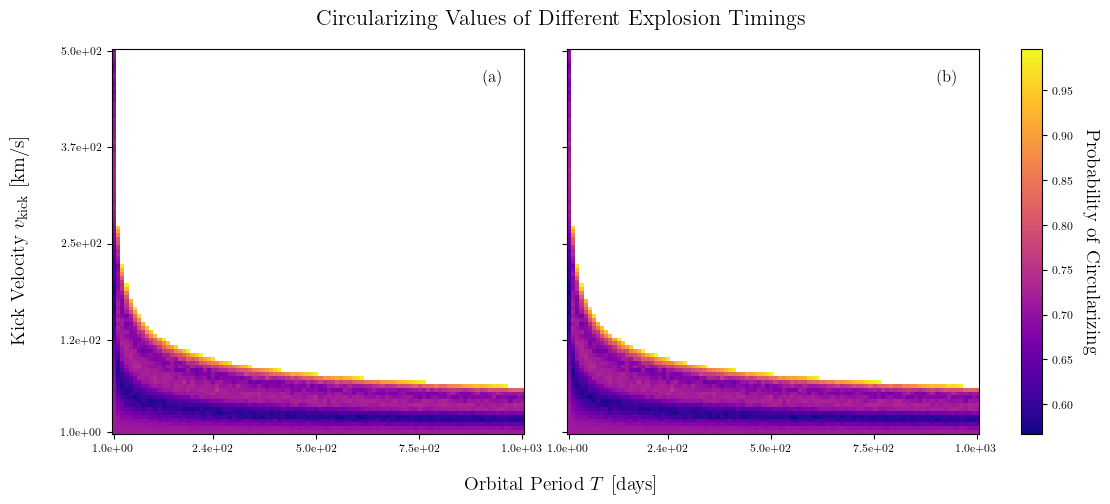

In [9]:
# circularizing value graphs 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 0.05], wspace=0.15, hspace=0.15)

circular_list = ['apoapsis', 'periapsis']
axes = [fig.add_subplot(gs[0, j]) for j in range(2)]
labels = ['(a)', '(b)']

for i, (graph, ax, label) in enumerate(zip(circular_list, axes, labels)):
    matrix = circularize_matrix_v2('apoapsis')
    img = ax.imshow(matrix, origin='lower', cmap='plasma', aspect='auto')

    x_ticks, x_labels_raw = get_ticks_labels(matrix.columns, num_ticks=5)
    x_labels = format_sci(x_labels_raw)
    y_ticks, y_labels_raw = get_ticks_labels(matrix.index, num_ticks=5)
    y_labels = format_sci(y_labels_raw)

    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)

    if True: #i in [2]:
        ax.set_xticklabels(x_labels, fontsize=8)
    else:
        ax.set_xticklabels([])

    if True: #i in [2]:
        ax.set_yticklabels(y_labels, fontsize=8)
    else:
        ax.set_yticklabels([])

    ax.text(0.95, 0.95, label, fontsize=12, color='black', ha='right', va='top', transform=ax.transAxes)
    ax.label_outer()

cax = fig.add_subplot(gs[0, 2])  
cbar = fig.colorbar(img, cax=cax)
cbar.set_label('Probability of Circularizing', fontsize=14, rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=8)

fig.text(0.5, 0.0, r'Orbital Period $T$ [days]', ha='center', fontsize=14)
fig.text(0.04, 0.5, r'Kick Velocity $v_{\mathrm{kick}}$ [km/s]', va='center', rotation='vertical', fontsize=14)
fig.suptitle('Circularizing Values of Different Explosion Timings', fontsize=16, y=0.96)
fig.savefig('graphs_resol/circularizing_probabilities_v2')

plt.show()
plt.close()

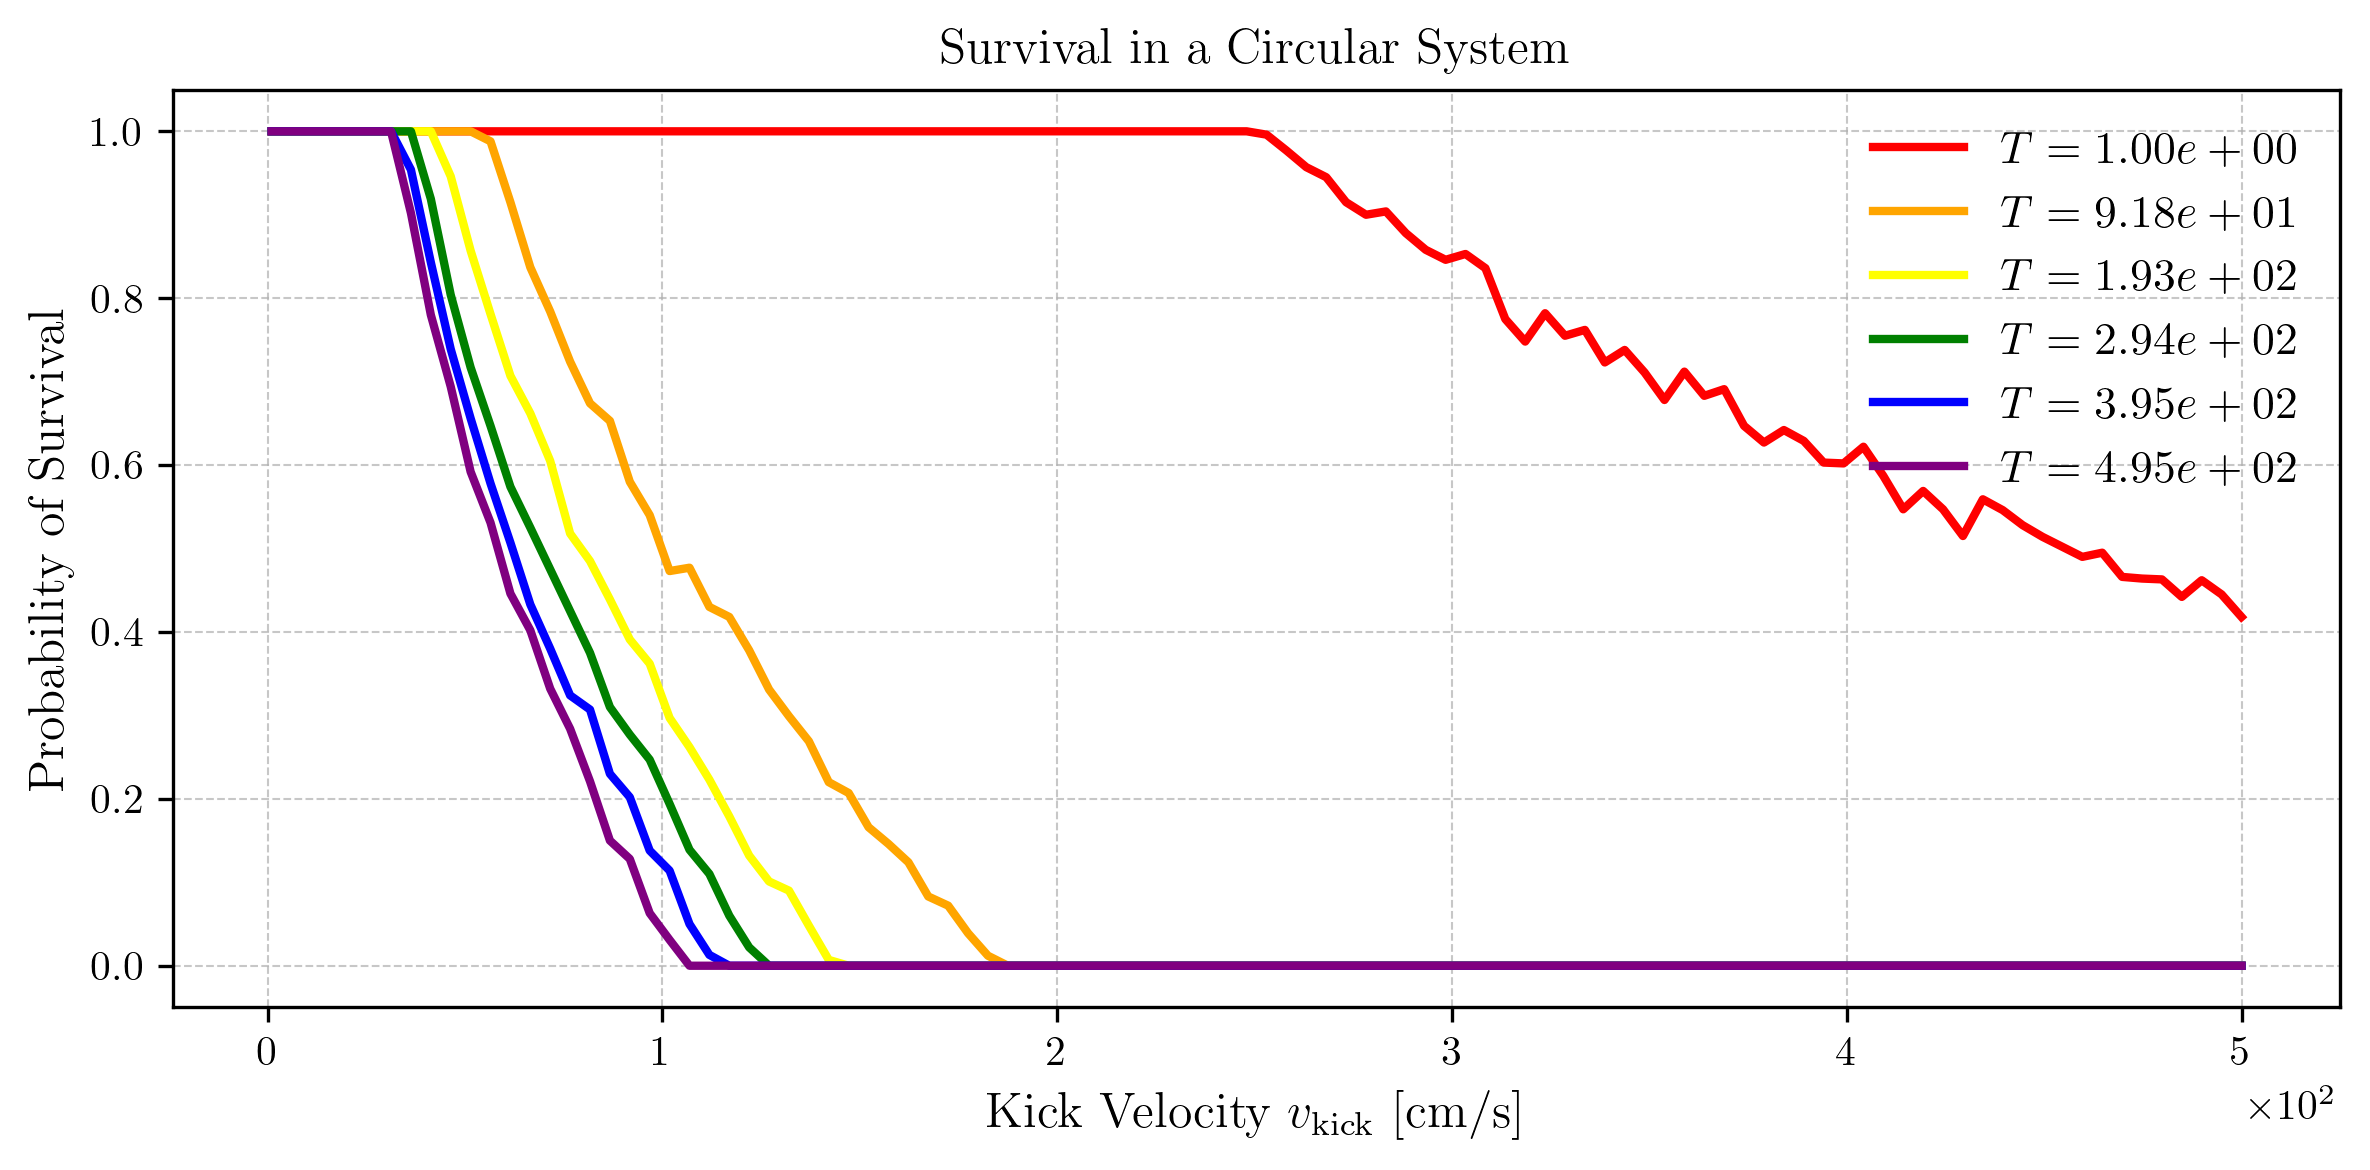

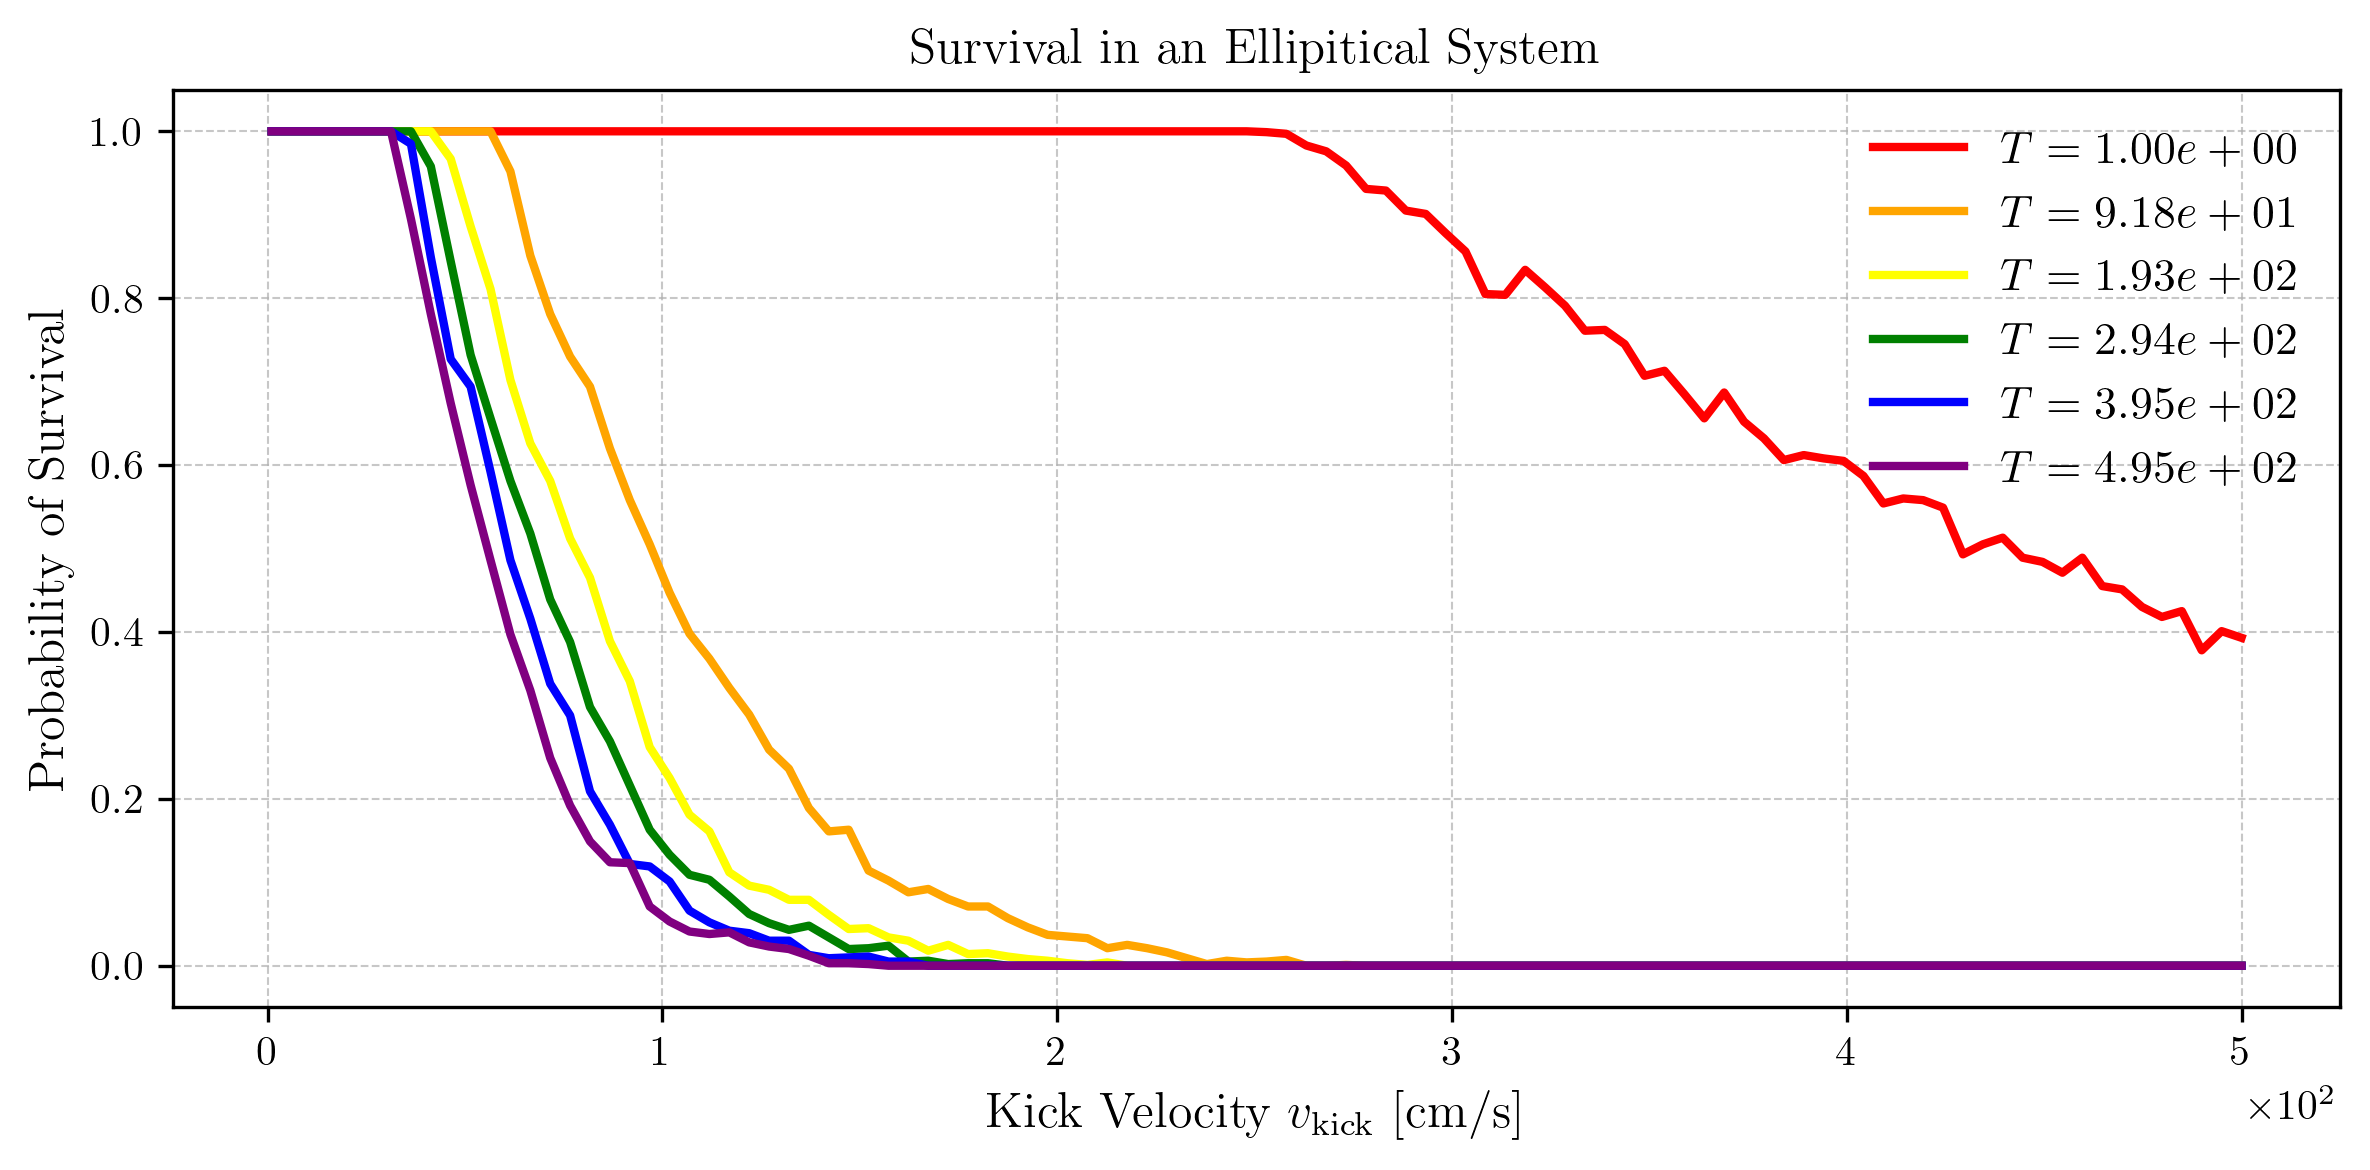

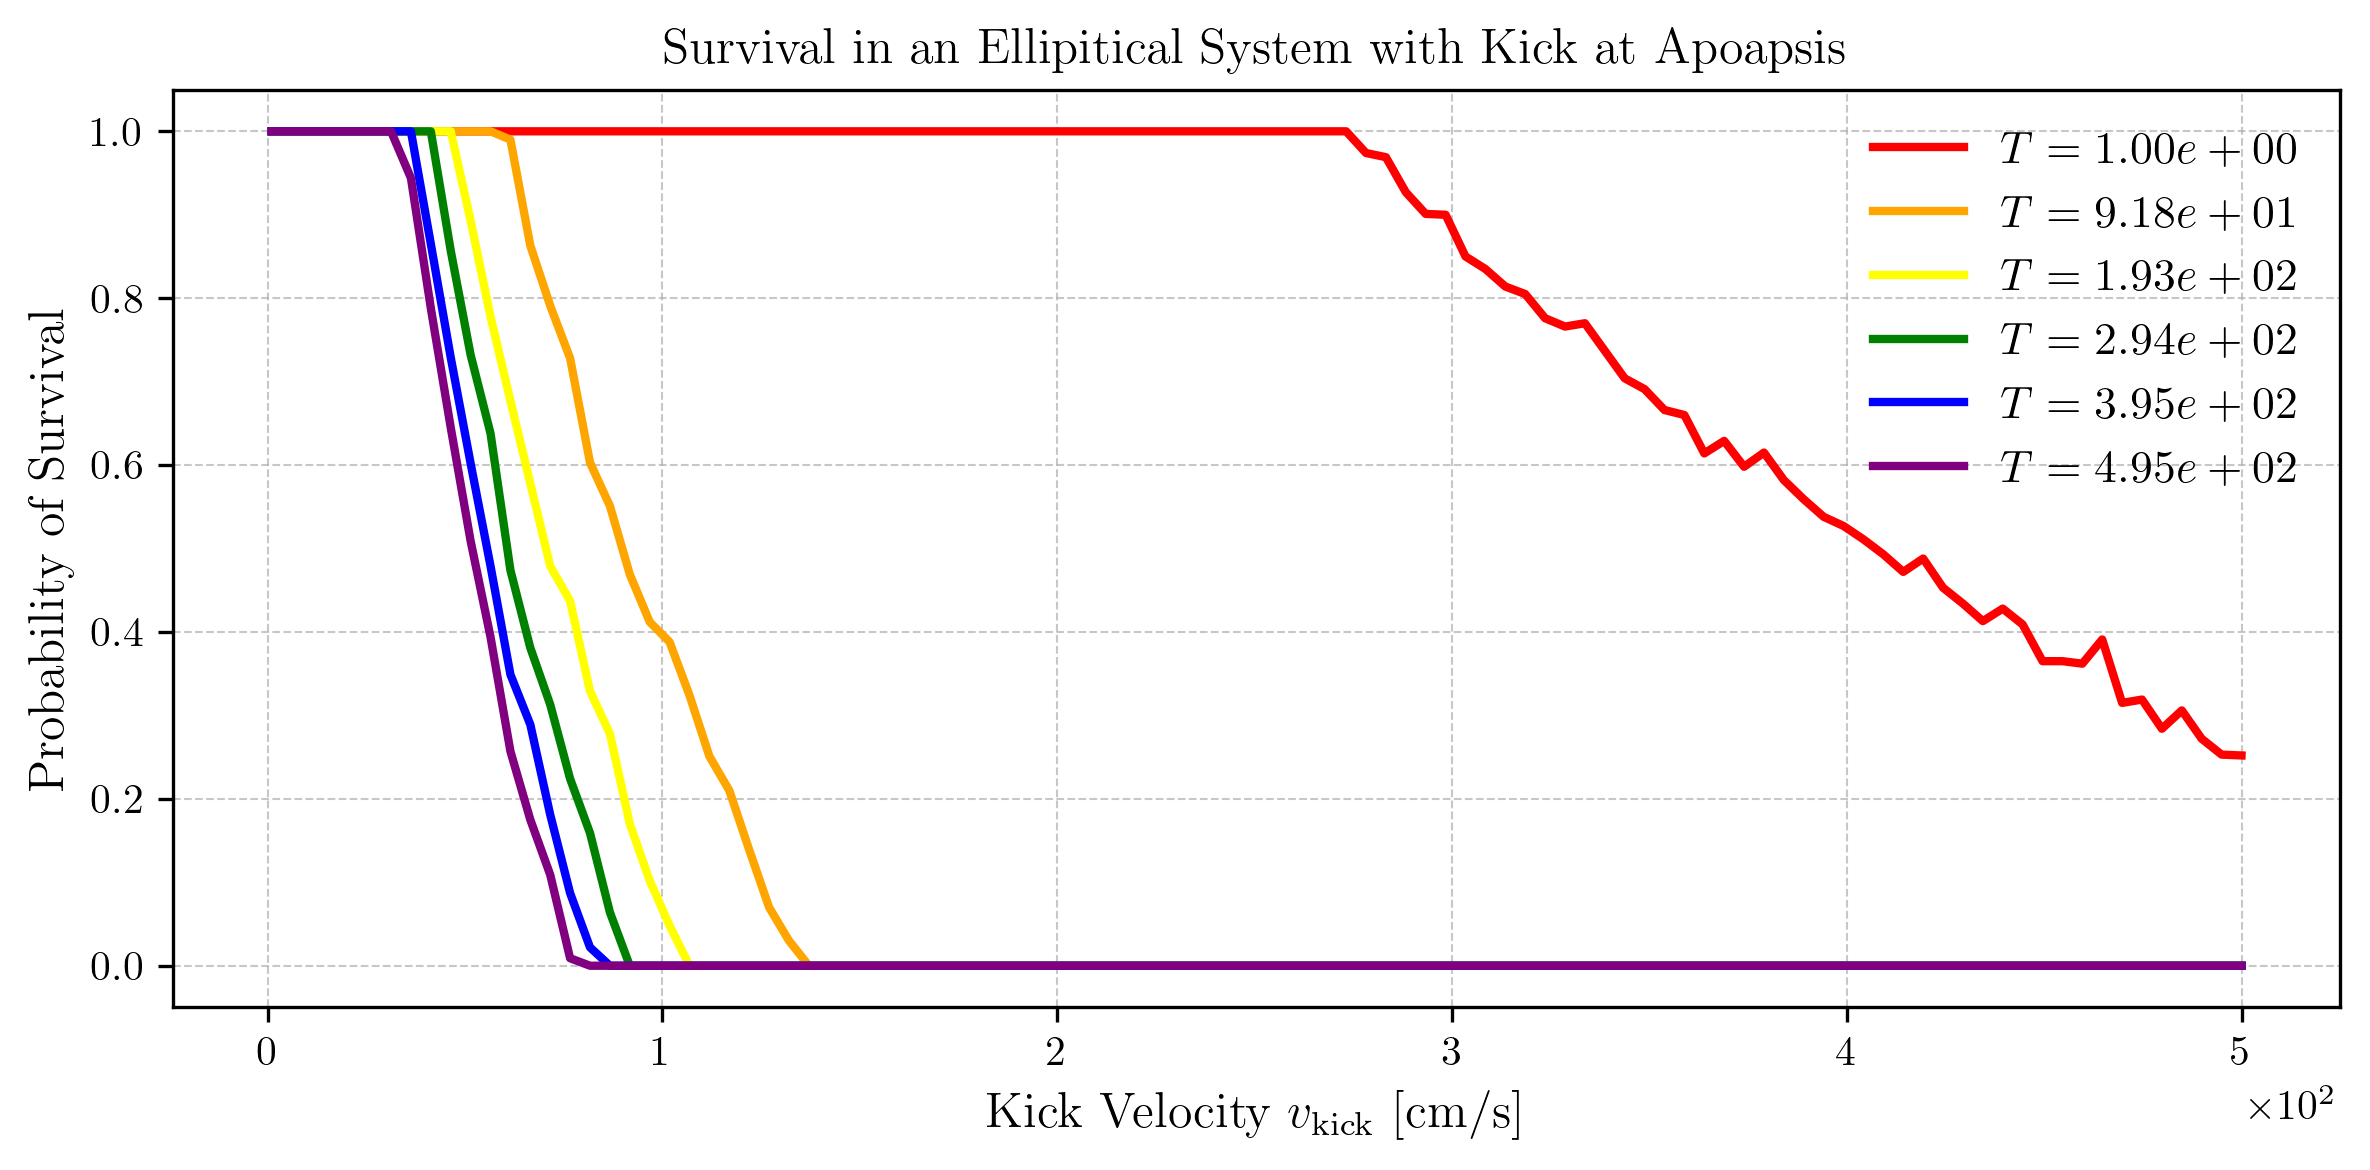

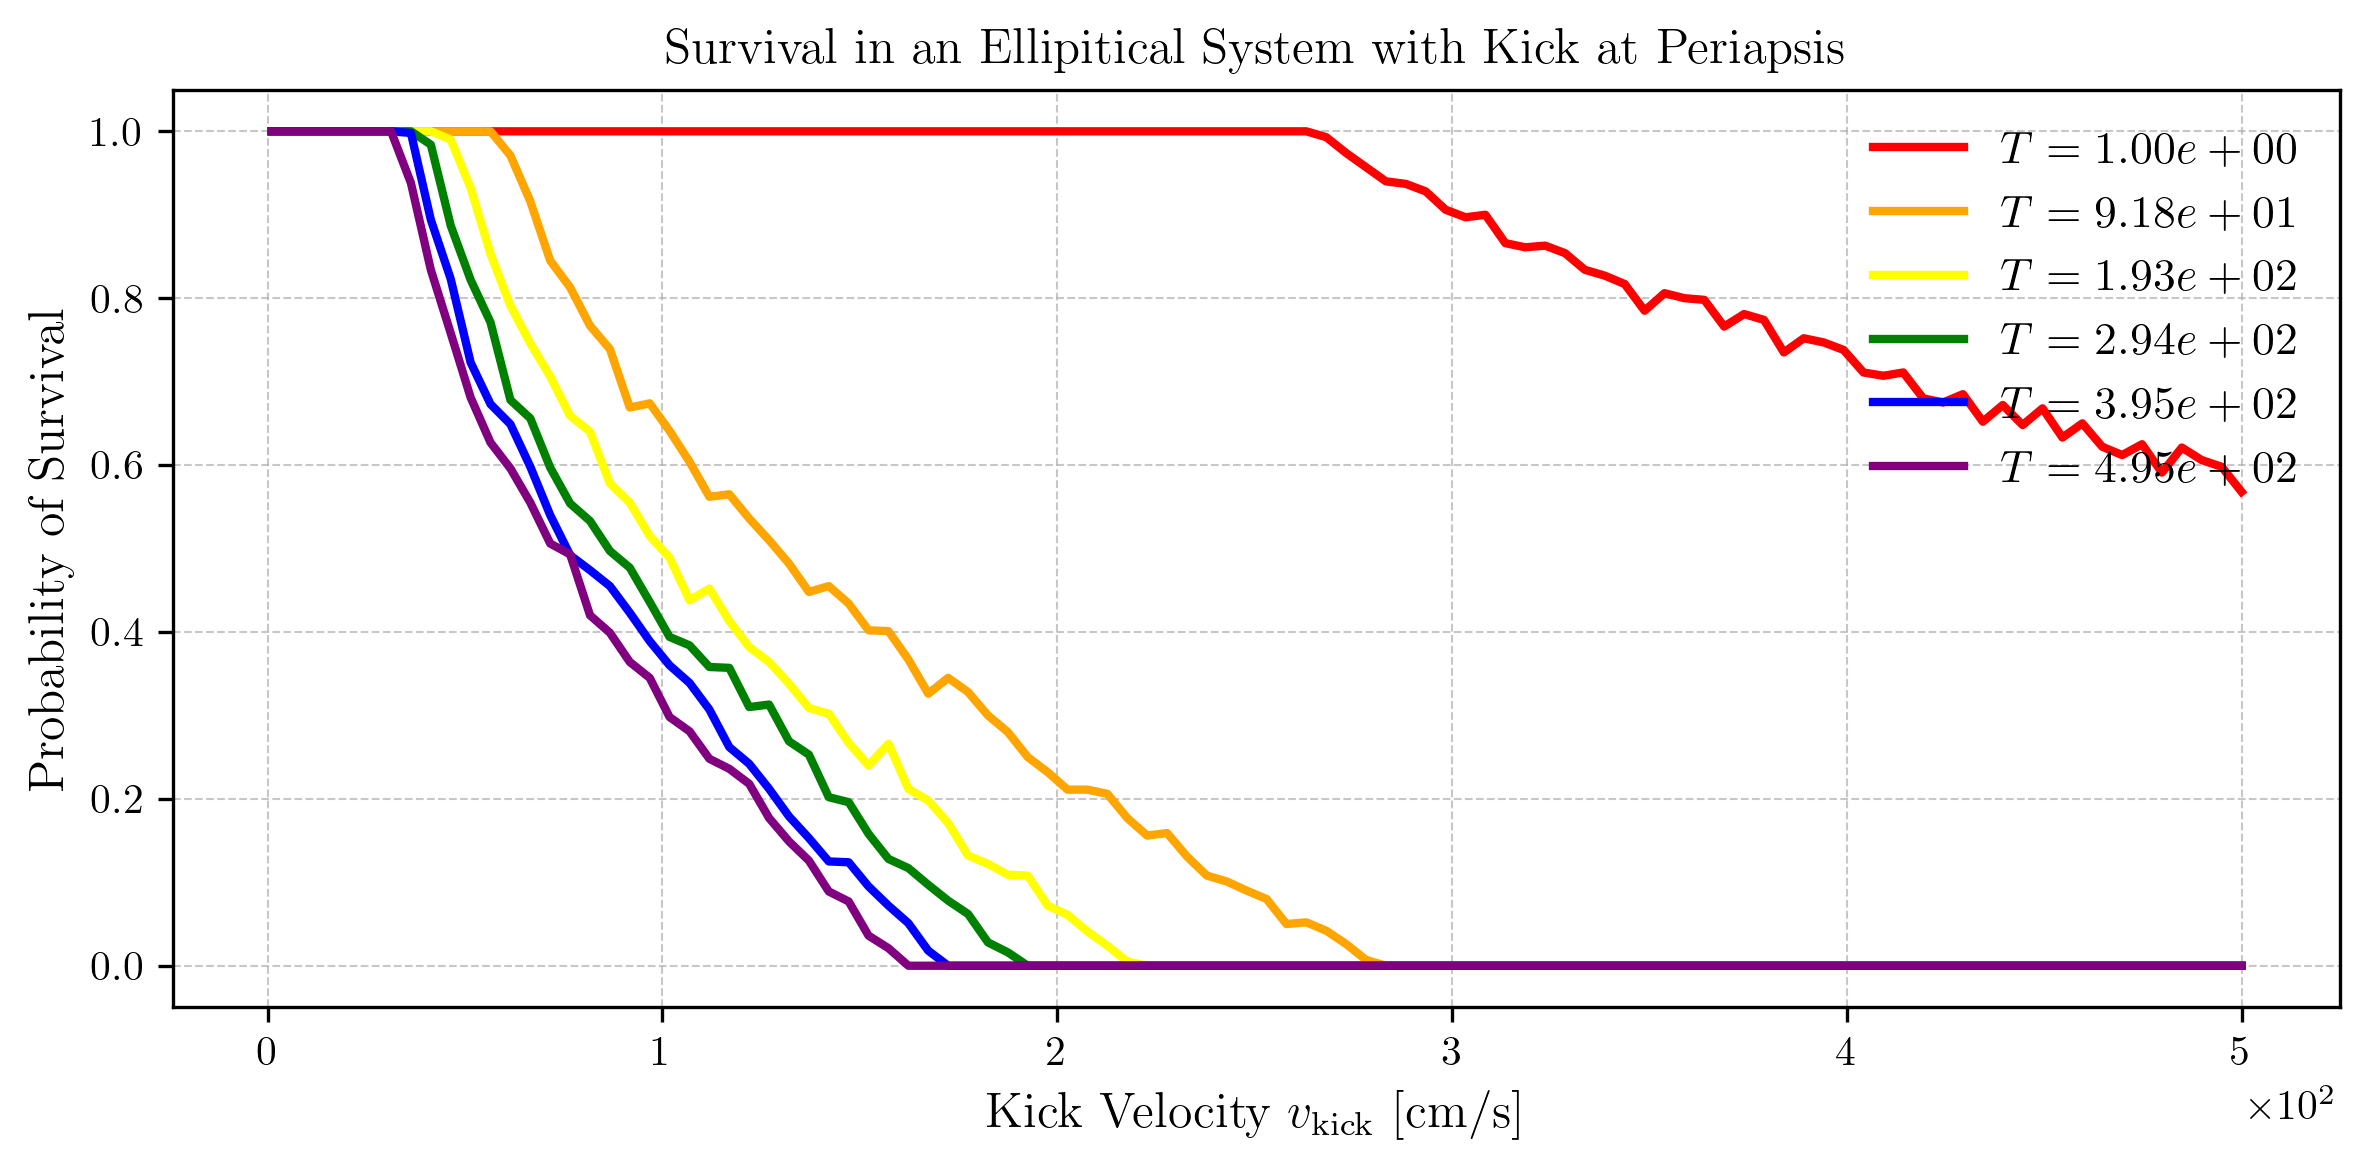

In [13]:
survival_list = ['circular', 'elliptical', 'apoapsis', 'periapsis']
for t in survival_list:
    matrix = survival_matrix(t)

    fig = plt.figure(figsize=(8, 4), dpi=300)
    indices = [0, 9, 19, 29, 39, 49]
    colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
    for i, n in enumerate(indices):
        period = matrix.columns[n]
        col = matrix[period]
        plt.plot(col.index.to_numpy(), col.values, label=fr'$T = {period:.2e}$', linewidth=2, color=colors[i])

    plt.xlabel(r'Kick Velocity $v_{\mathrm{kick}}$ [cm/s]', fontsize=12)
    plt.ylabel(r'Probability of Survival', fontsize=12)
    if t == 'circular':
        title = 'Survival in a Circular System'
    else:
        title = 'Survival in an Ellipitical System'
        if t == 'apoapsis':
            title = title + ' with Kick at Apoapsis'
        if t == 'periapsis':
            title = title + ' with Kick at Periapsis'
        
    plt.title(title, fontsize=12)

    plt.legend(fontsize=11, loc='upper right', frameon=False)

    plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    fig.savefig(f"graphs_resol/{t}_surival_periods.png", dpi=600)

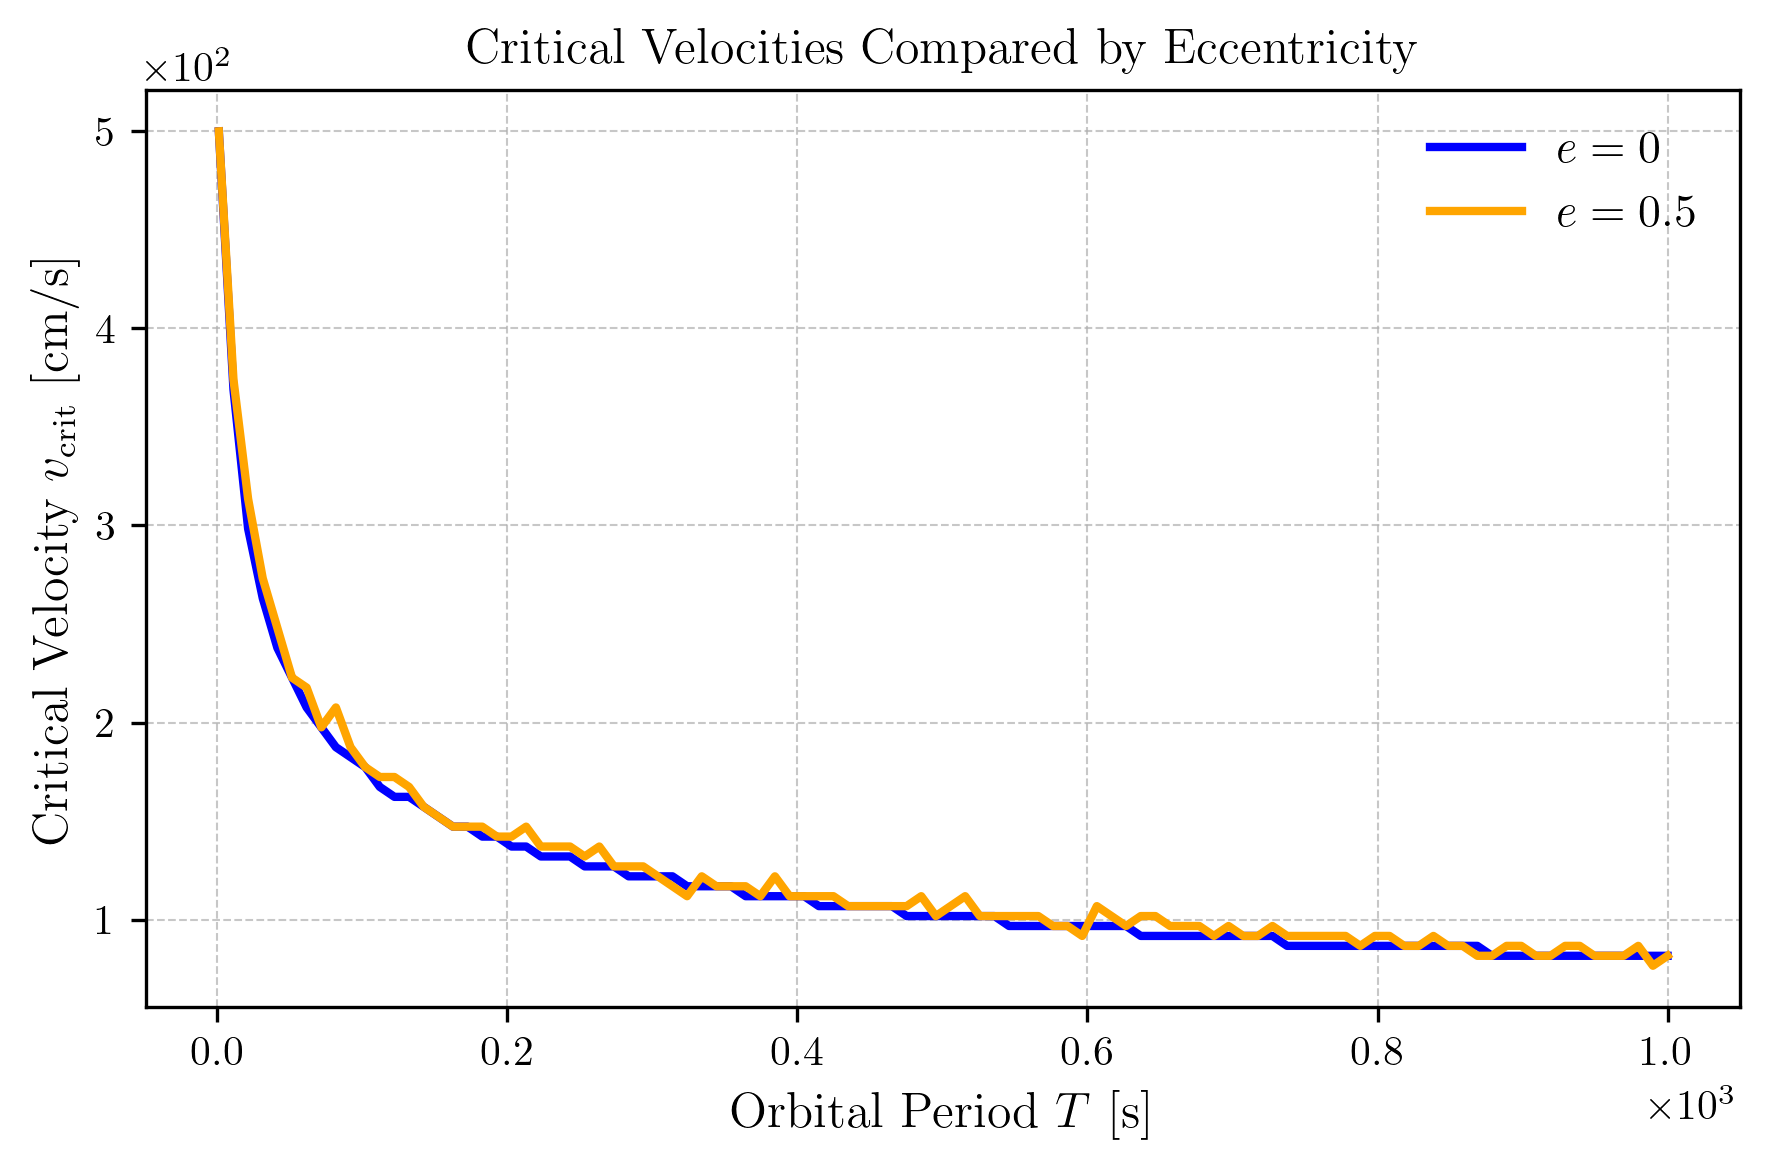

In [16]:
matrix = survival_matrix('circular')
periods = matrix.columns
critical_velocities_circular = []
for T in periods:
    cv = None
    for i, v in enumerate(matrix[T]):
        if v > 0.0:
            cv = i
    critical_velocities_circular.append(matrix.index[cv])

matrix = survival_matrix('elliptical')
critical_velocities_elliptical = []
for T in periods:
    cv = None
    for i, v in enumerate(matrix[T]):
        if v > 0.05:
            cv = i
    critical_velocities_elliptical.append(matrix.index[cv])

fig = plt.figure(figsize=(6, 4), dpi=300)
plt.plot(periods, critical_velocities_circular, label=r'$e = 0$', linewidth=2, color='blue')
plt.plot(periods, critical_velocities_elliptical, label=r'$e = 0.5$', linewidth=2, color='orange')

plt.xlabel(r'Orbital Period $T$ [s]', fontsize=12)
plt.ylabel(r'Critical Velocity $v_{\mathrm{crit}}$ [cm/s]', fontsize=12)
plt.title('Critical Velocities Compared by Eccentricity')

plt.legend(fontsize=11, loc='upper right', frameon=False)

plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
#fig.savefig('graphs_resol/critical_velocities.png', dpi=600)

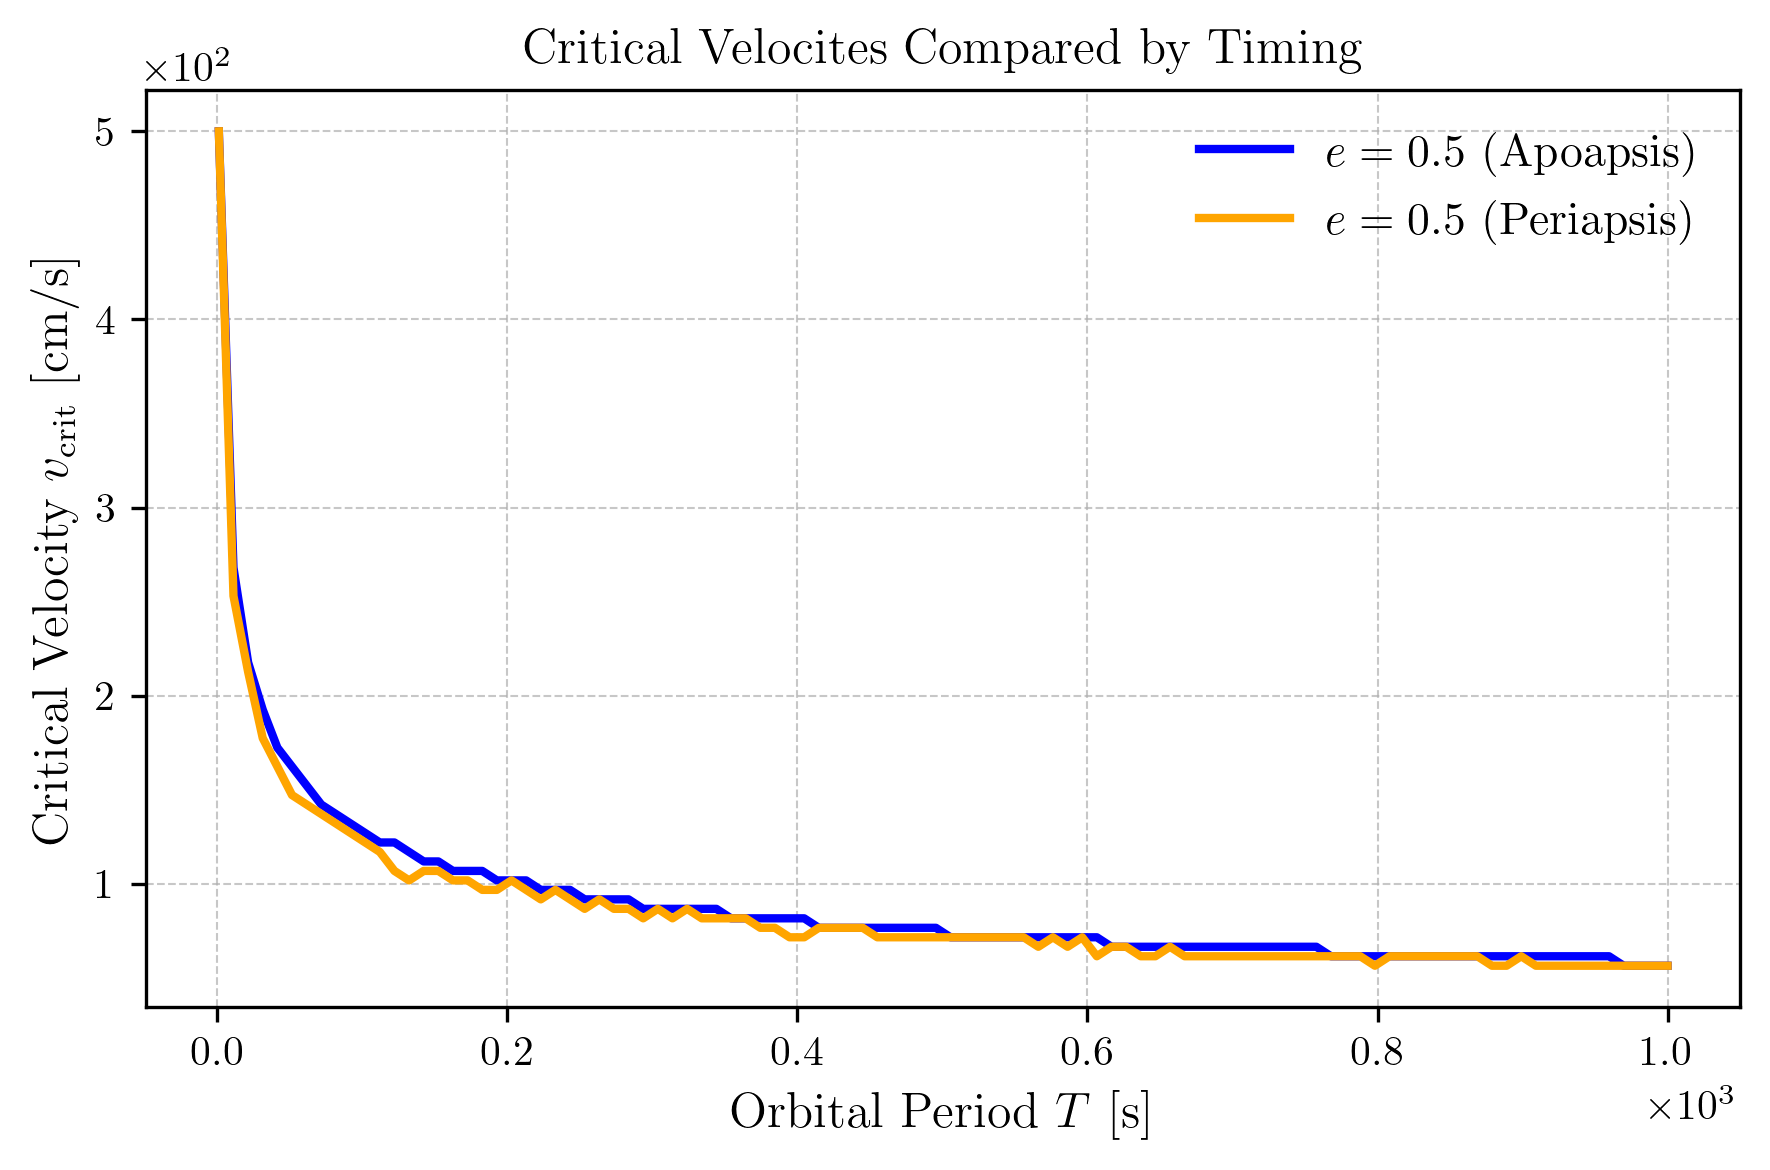

In [19]:
matrix = survival_matrix('apoapsis')
periods = matrix.columns
critical_velocities_apoapsis = []
for T in periods:
    cv = None
    for i, v in enumerate(matrix[T]):
        if v > 0:
            cv = i
    critical_velocities_apoapsis.append(matrix.index[cv])

matrix = survival_matrix('periapsis')
critical_velocities_periapsis = []
for T in periods:
    cv = None
    for i, v in enumerate(matrix[T]):
        if v > 0.5:
            cv = i
    critical_velocities_periapsis.append(matrix.index[cv])

fig = plt.figure(figsize=(6, 4), dpi=300)
plt.plot(periods, critical_velocities_apoapsis, label=r'$e = 0.5$ (Apoapsis)', linewidth=2, color='blue')
plt.plot(periods, critical_velocities_periapsis, label=r'$e = 0.5$ (Periapsis)', linewidth=2, color='orange')

plt.xlabel(r'Orbital Period $T$ [s]', fontsize=12)
plt.ylabel(r'Critical Velocity $v_{\mathrm{crit}}$ [cm/s]', fontsize=12)
plt.title('Critical Velocites Compared by Timing')

plt.legend(fontsize=11, loc='upper right', frameon=False)

plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
fig.savefig('graphs_resol/critical_velocities_timing.png', dpi=600)